# Imports

In [4]:
!pip install pandas seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataframe_train = pd.read_csv('train-data.csv')
dataframe_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Preprocessing

In [7]:
train_data = dataframe_train.copy()

for i in range(0, len(train_data)):
    if train_data['Power'][i] == 'null bhp':
        train_data['Power'][i] = np.nan

for i in range(0, len(train_data)):
    if train_data['Mileage'][i] in ['0.0 kmpl', '0.0 km/kg']:
        train_data['Mileage'][i] = np.nan

for i in range(0, len(train_data)):
    if train_data['Engine'][i] in ['null CC', '0 CC']:
        train_data['Engine'][i] = np.nan

c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [8]:
train_data.drop(['New_Price'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.dropna(inplace = True)

In [9]:
train_data.reset_index(inplace = True)

train_data.drop(['index'], axis=1, inplace=True)

y = train_data.iloc[:,-1].values

City = train_data['Location'].unique()

brand=[]


In [10]:
for i in range(0, 5844):
    k = train_data['Name'][i].split()
    brand.append(k[0].upper())
print(brand)

['MARUTI', 'HYUNDAI', 'HONDA', 'MARUTI', 'AUDI', 'HYUNDAI', 'NISSAN', 'TOYOTA', 'VOLKSWAGEN', 'TATA', 'MARUTI', 'HONDA', 'MARUTI', 'LAND', 'MITSUBISHI', 'HONDA', 'MARUTI', 'RENAULT', 'MERCEDES-BENZ', 'BMW', 'MARUTI', 'AUDI', 'HYUNDAI', 'VOLKSWAGEN', 'HONDA', 'NISSAN', 'MARUTI', 'HONDA', 'TOYOTA', 'RENAULT', 'TOYOTA', 'MAHINDRA', 'AUDI', 'VOLKSWAGEN', 'MARUTI', 'MARUTI', 'MAHINDRA', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'MARUTI', 'TATA', 'MAHINDRA', 'HYUNDAI', 'HYUNDAI', 'TOYOTA', 'HYUNDAI', 'TOYOTA', 'HYUNDAI', 'MAHINDRA', 'AUDI', 'MARUTI', 'MARUTI', 'MARUTI', 'HYUNDAI', 'VOLKSWAGEN', 'RENAULT', 'HYUNDAI', 'NISSAN', 'MARUTI', 'TOYOTA', 'FORD', 'MERCEDES-BENZ', 'MERCEDES-BENZ', 'TATA', 'AUDI', 'HONDA', 'MARUTI', 'HYUNDAI', 'PORSCHE', 'MAHINDRA', 'HYUNDAI', 'NISSAN', 'HONDA', 'AUDI', 'TOYOTA', 'TOYOTA', 'MARUTI', 'TATA', 'HONDA', 'FORD', 'MARUTI', 'HONDA', 'BMW', 'HYUNDAI', 'HYUNDAI', 'HONDA', 'TOYOTA', 'AUDI', 'FORD', 'MAHINDRA', 'HONDA', 'VOLKSWAGEN', 'HYUNDAI', 'MARUTI', 'VOLKSWAGEN', 'HYUND

In [11]:
Brand = np.array(brand)

# Data Visualization

In [12]:
type(train_data['Seats'][0])

numpy.float64

[Text(0, 0, '2.0'),
 Text(1, 0, '4.0'),
 Text(2, 0, '5.0'),
 Text(3, 0, '6.0'),
 Text(4, 0, '7.0'),
 Text(5, 0, '8.0'),
 Text(6, 0, '9.0'),
 Text(7, 0, '10.0')]

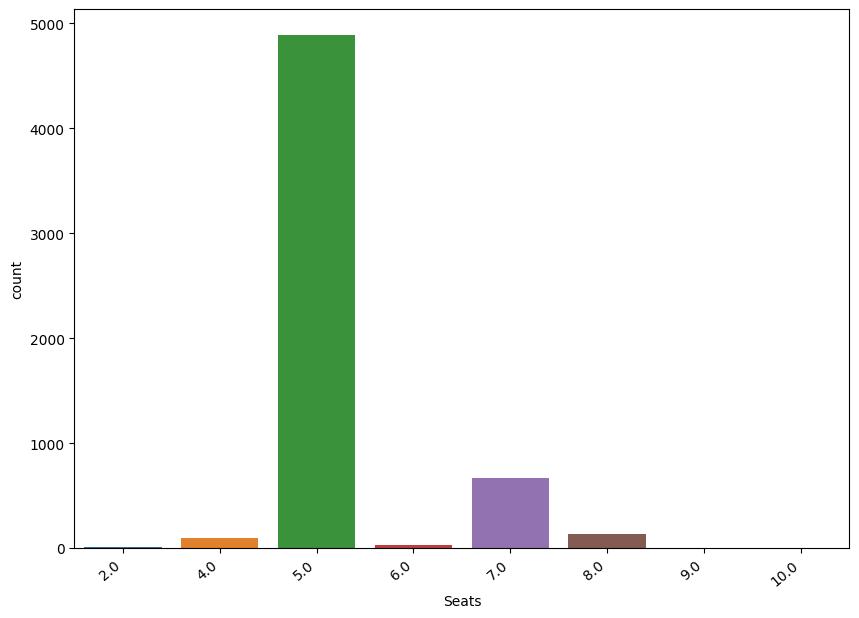

In [13]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 1, 1)
ax = sns.countplot(data=train_data, x='Seats')
ax.set_xlabel("Seats")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


In [14]:
Brand = pd.get_dummies(Brand, drop_first = True, dtype=int)

In [15]:
unique_brands=[]
for i in range(0,5844):
    if brand[i] in unique_brands:
        continue
    else:
        unique_brands.append(brand[i])
print(unique_brands)

['MARUTI', 'HYUNDAI', 'HONDA', 'AUDI', 'NISSAN', 'TOYOTA', 'VOLKSWAGEN', 'TATA', 'LAND', 'MITSUBISHI', 'RENAULT', 'MERCEDES-BENZ', 'BMW', 'MAHINDRA', 'FORD', 'PORSCHE', 'DATSUN', 'JAGUAR', 'VOLVO', 'CHEVROLET', 'SKODA', 'MINI', 'FIAT', 'JEEP', 'AMBASSADOR', 'ISUZU', 'FORCE', 'BENTLEY', 'LAMBORGHINI']


[Text(0, 0, 'Mumbai'),
 Text(1, 0, 'Pune'),
 Text(2, 0, 'Chennai'),
 Text(3, 0, 'Coimbatore'),
 Text(4, 0, 'Hyderabad'),
 Text(5, 0, 'Jaipur'),
 Text(6, 0, 'Kochi'),
 Text(7, 0, 'Kolkata'),
 Text(8, 0, 'Delhi'),
 Text(9, 0, 'Bangalore'),
 Text(10, 0, 'Ahmedabad')]

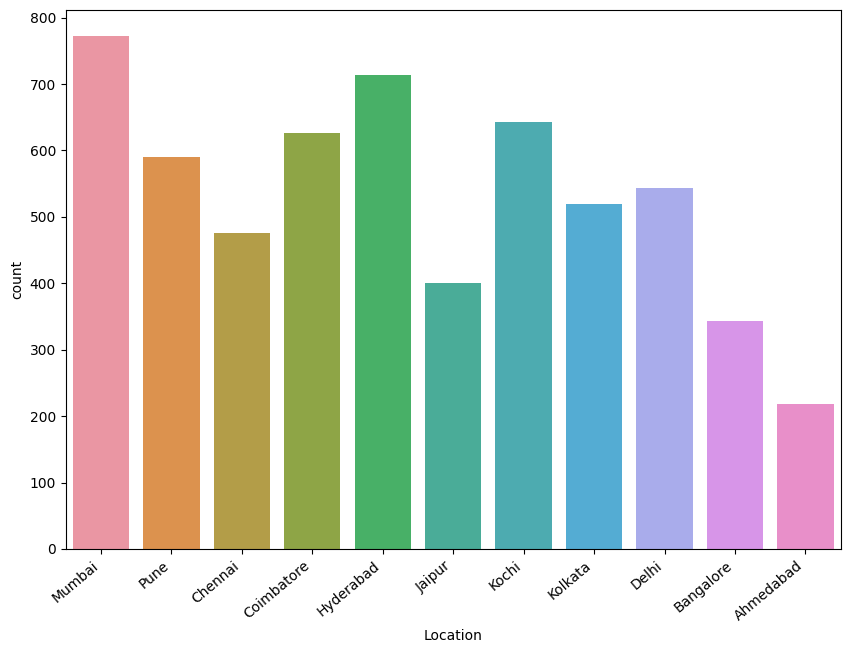

In [16]:
Loc = train_data['Location']

fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
ax = sns.countplot(data=train_data, x='Location')
ax.set_xlabel("Location")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

In [17]:
Loc = pd.get_dummies(Loc, drop_first = True, dtype=int)
train_data['Seats'] = train_data['Seats'].astype(int)

Text(0.5, 0, 'Seats')

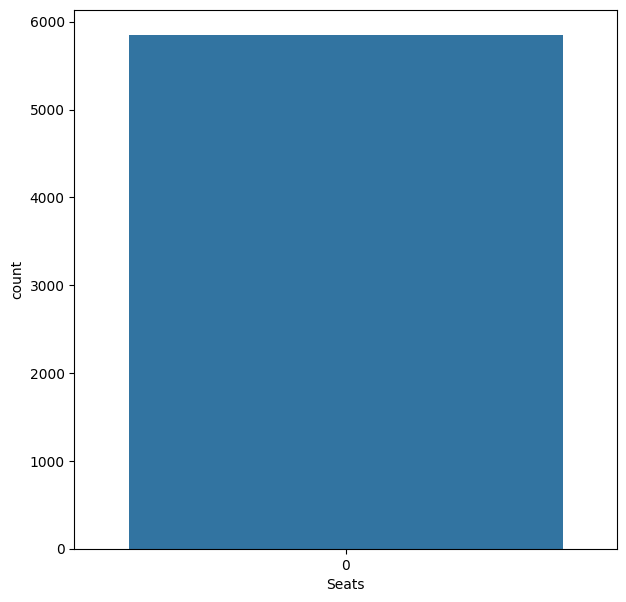

In [18]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot(1,1,1)

ax = sns.countplot(train_data['Seats'])
ax.set_xlabel("Seats")


Text(0.5, 0, 'Fuel Type')

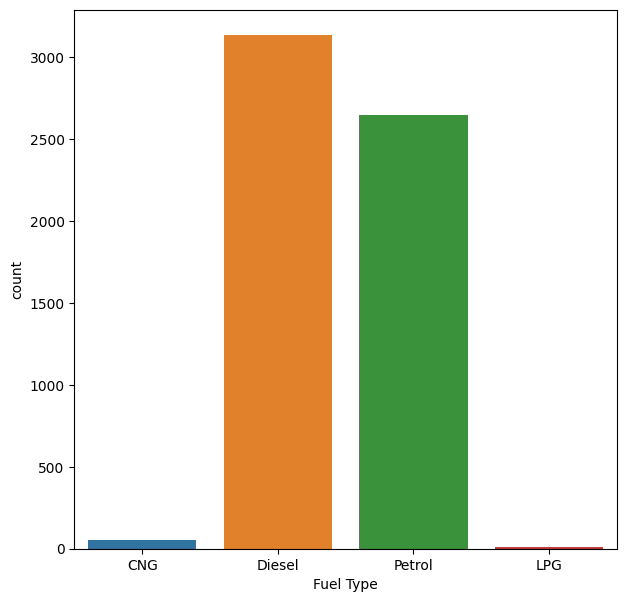

In [19]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot(1,1,1)

ax = sns.countplot(data=train_data, x='Fuel_Type')
ax.set_xlabel("Fuel Type")

Text(0.5, 0, 'Transmission')

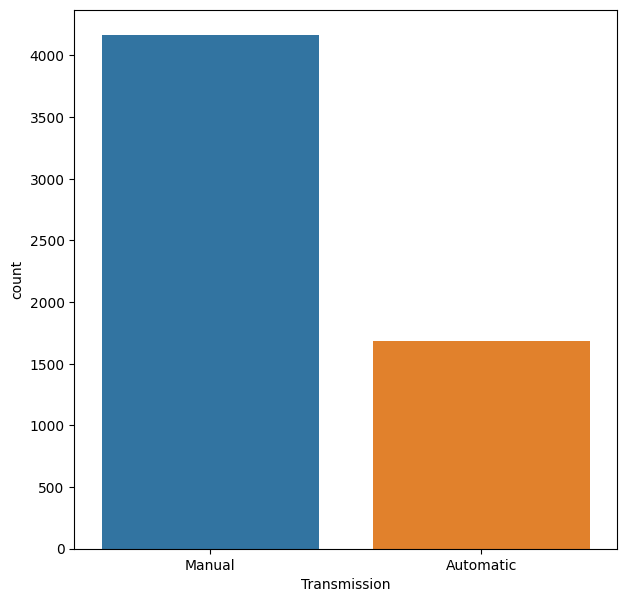

In [20]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot(1,1,1)
ax = sns.countplot(data=train_data, x='Transmission')
ax.set_xlabel("Transmission")

Text(0.5, 0, 'Owner Type')

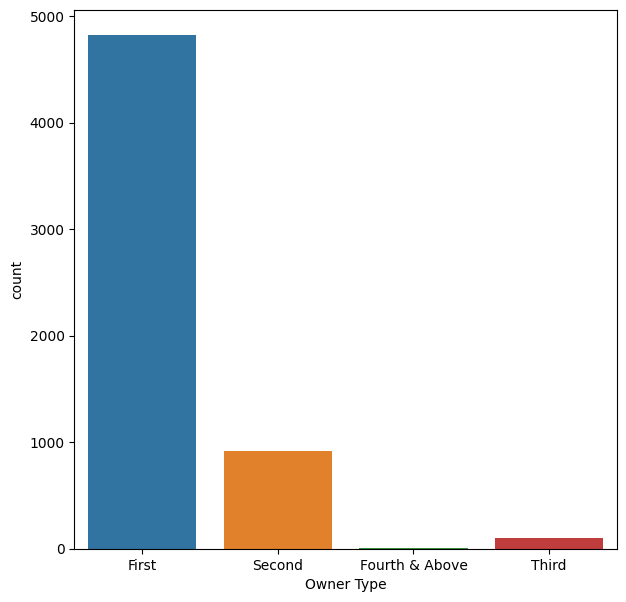

In [21]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot(1,1,1)

ax = sns.countplot(data=train_data, x='Owner_Type')
ax.set_xlabel("Owner Type")

# Getting data ready for modeling

In [22]:
train_data.replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}, inplace = True)


In [23]:
print(train_data)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
5839                  Maruti Swift VDI       Delhi  2014              27365   
5840          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
5841             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
5842                Maruti Wagon R VXI     Kolkata  2013              46000   
5843             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission  Owner_Type     Mileage

In [24]:
for i in range(0, 5844):
    k = train_data['Mileage'][i].split()
    train_data['Mileage'][i] = k[0]
    
for i in range(0, 5844):
    k = train_data['Power'][i].split()
    train_data['Power'][i] = k[0]
    
for i in range(0, 5844):
    k = train_data['Engine'][i].split()
    train_data['Engine'][i] = k[0]

c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [25]:
train_data['Engine'] = train_data['Engine'].astype(int)
train_data['Power'] = train_data['Power'].astype(float)
train_data['Mileage'] = train_data['Mileage'].astype(float)

Fuel = train_data['Fuel_Type']
Fuel = pd.get_dummies(Fuel, drop_first = True, dtype=int)

Trans = train_data['Transmission']
Trans = pd.get_dummies(Trans, drop_first = True, dtype=int)

data_train = pd.concat([train_data, Brand, Loc, Fuel, Trans], axis = 1)

data_train.drop(["Name", "Location", "Fuel_Type",'Transmission','Price'], axis = 1, inplace = True)

In [26]:
#TEST DATA PREPROCESSING
dataframe_test = pd.read_csv('test-data.csv')

test_data = dataframe_test.copy()

In [27]:
for i in range(0, len(test_data)):
    if test_data['Power'][i] == 'null bhp':
        test_data['Power'][i] = np.nan
        
for i in range(0, len(test_data)):
    if test_data['Mileage'][i] == '0.0 kmpl' or test_data['Mileage'][i] == '0.0 km/kg':
        test_data['Mileage'][i] = np.nan
         
for i in range(0, len(test_data)):
    if test_data['Engine'][i] == 'null CC' or test_data['Engine'][i] == '0 CC':
        test_data['Engine'][i] = np.nan

c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
test_data.drop(['New_Price'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.dropna(inplace = True)

test_data.reset_index(inplace = True)

test_data.drop(['index'], axis=1, inplace=True)

In [29]:
City_test = test_data['Location'].unique()

In [30]:
brand_test=[]

for i in range(0, 1195):
    k = test_data['Name'][i].split()
    brand_test.append(k[0].upper())
    

In [31]:
Brand_test = np.array(brand_test)

Brand_test = pd.get_dummies(Brand_test, drop_first = True, dtype=int)

unique_brands_test=[]
for i in range(0,1195):
    if brand_test[i] in unique_brands_test:
        continue
    else:
        unique_brands_test.append(brand_test[i])

In [32]:
Loc_test = test_data['Location']

Loc_test = pd.get_dummies(Loc_test, drop_first = True, dtype=int)

In [33]:
test_data['Seats'] = test_data['Seats'].astype(int)

test_data.replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}, inplace = True)

for i in range(0, 1195):
    k = test_data['Mileage'][i].split()
    test_data['Mileage'][i] = k[0]
    
for i in range(0, 1195):
    k = test_data['Power'][i].split()
    test_data['Power'][i] = k[0]
    
for i in range(0, 1195):
    k = test_data['Engine'][i].split()
    test_data['Engine'][i] = k[0]

c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [34]:
test_data['Engine'] = test_data['Engine'].astype(int)
test_data['Power'] = test_data['Power'].astype(float)
test_data['Mileage'] = test_data['Mileage'].astype(float)

Fuel_test = test_data['Fuel_Type']
Fuel_test = pd.get_dummies(Fuel_test, drop_first = True, dtype=int)

Trans_test = test_data['Transmission']
Trans_test = pd.get_dummies(Trans_test, drop_first = True, dtype=int)

data_test = pd.concat([test_data, Brand_test, Loc_test, Fuel_test, Trans_test], axis = 1)

data_test.drop(["Name", "Location", "Fuel_Type",'Transmission'], axis = 1, inplace = True)

<AxesSubplot:>

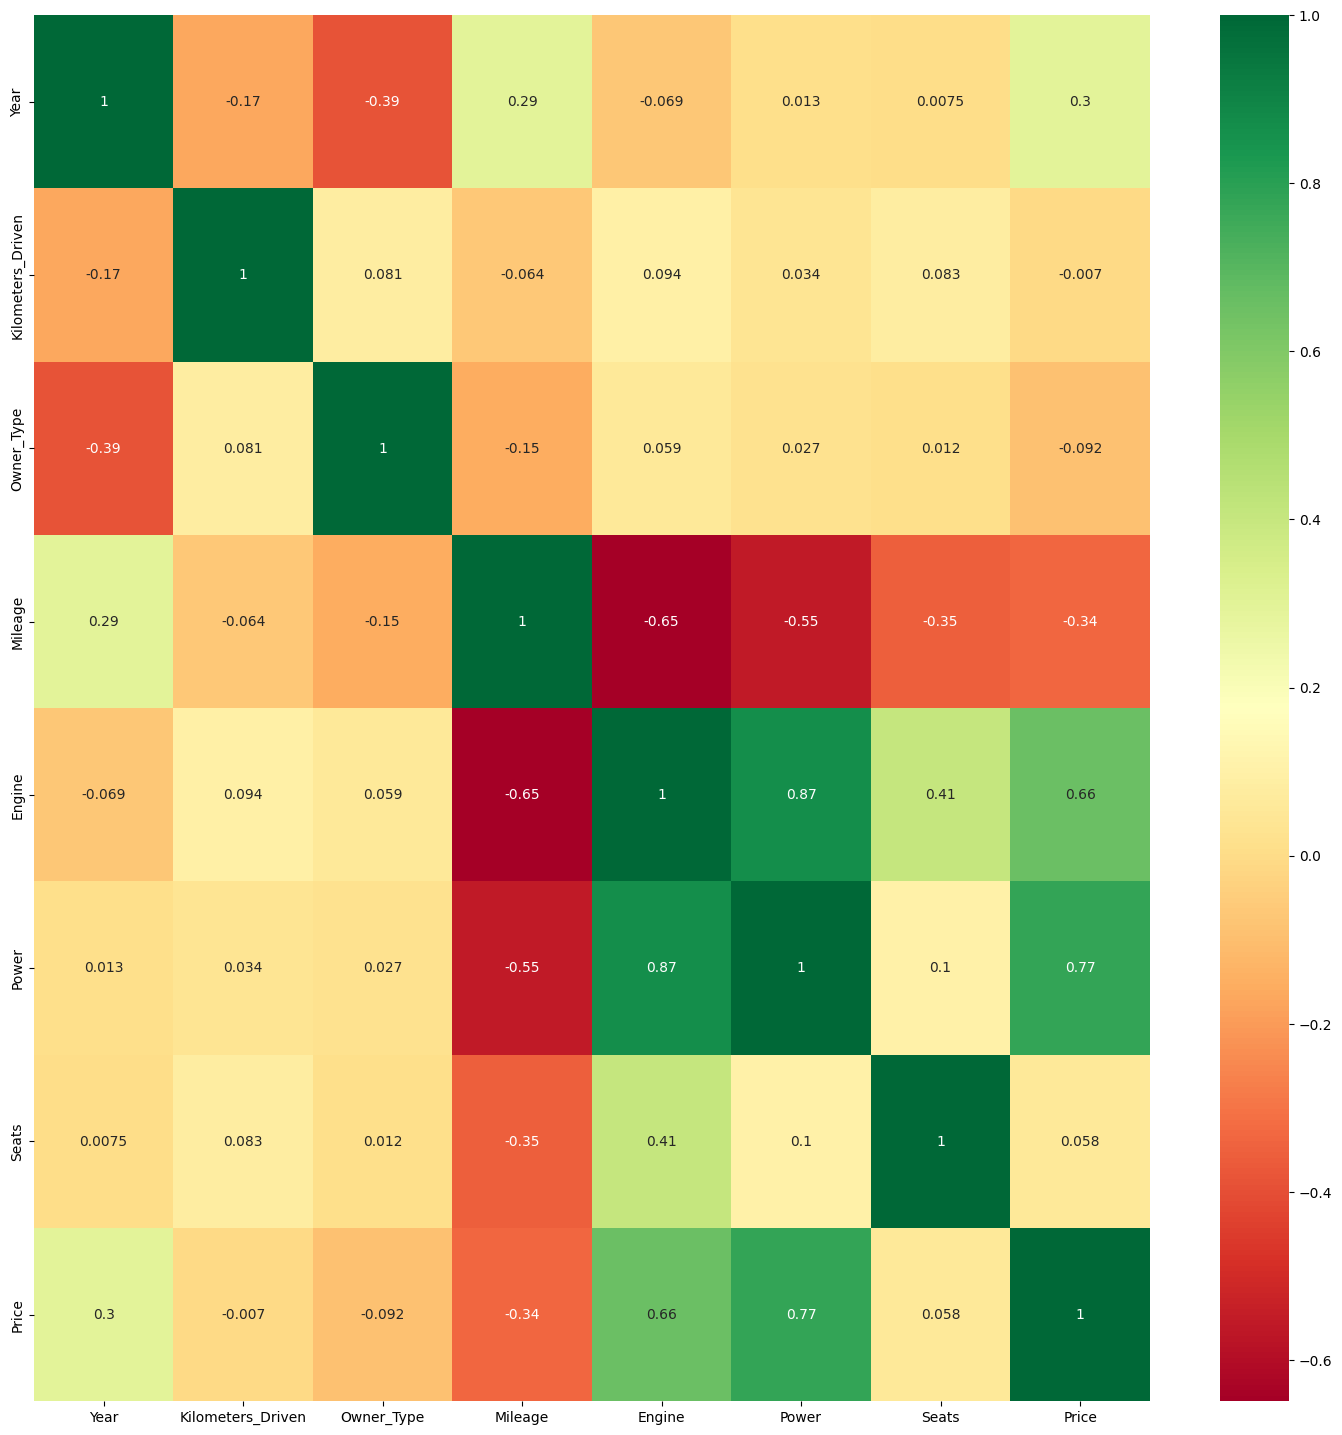

In [35]:
X = data_train.copy()

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")


# Model

In [36]:
import pandas as pd

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Check for missing values in X DataFrame
missing_values_X = X_df.isnull().sum()
print("Missing values in X:", missing_values_X)

# Check for missing values in y DataFrame
missing_values_y = y_df.isnull().sum()
print("Missing values in y:", missing_values_y)


Missing values in X: Year                 0
Kilometers_Driven    0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
AUDI                 0
BENTLEY              0
BMW                  0
CHEVROLET            0
DATSUN               0
FIAT                 0
FORCE                0
FORD                 0
HONDA                0
HYUNDAI              0
ISUZU                0
JAGUAR               0
JEEP                 0
LAMBORGHINI          0
LAND                 0
MAHINDRA             0
MARUTI               0
MERCEDES-BENZ        0
MINI                 0
MITSUBISHI           0
NISSAN               0
PORSCHE              0
RENAULT              0
SKODA                0
TATA                 0
TOYOTA               0
VOLKSWAGEN           0
VOLVO                0
Bangalore            0
Chennai              0
Coimbatore           0
Delhi                0
Hyderabad            0
Jaipur               0
Kochi                0
Kolkata      

In [37]:
!pip install --upgrade numpy
!pip install --upgrade pandas

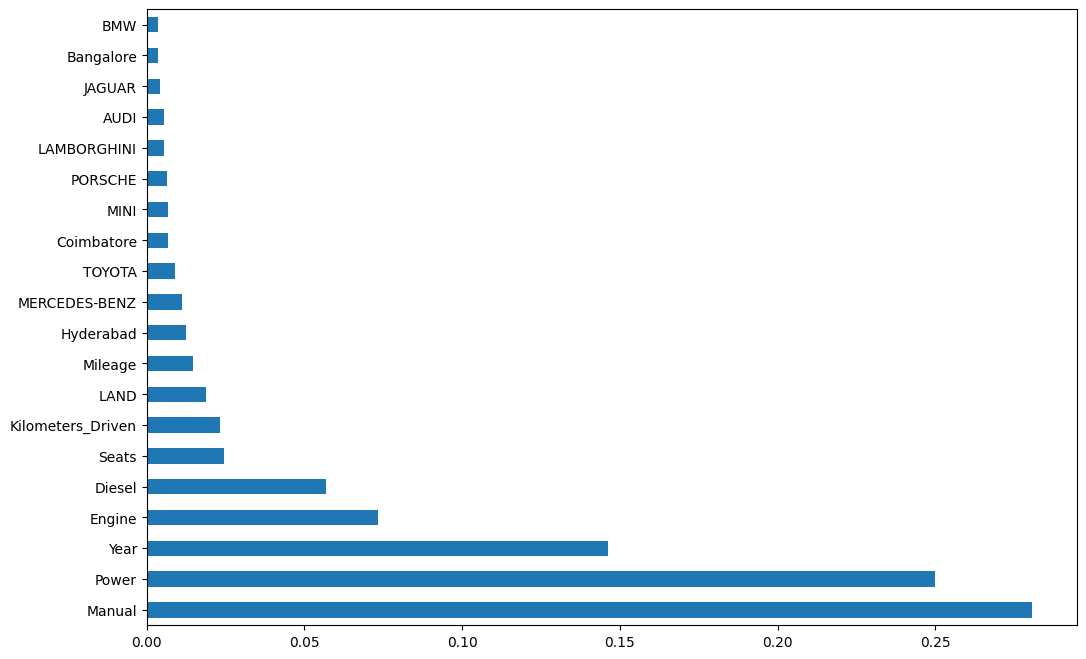

In [38]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  del sys.path[0]


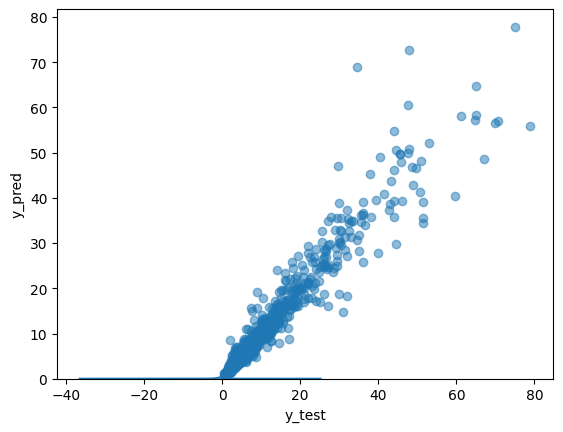

In [39]:
#Fitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.score(X_train, y_train)
regressor.score(X_test, y_test)
sns.distplot(y_test-y_pred)

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


## Metrics

In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.3415276703735386
MSE: 8.384746047863645
RMSE: 2.895642596706929


In [41]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Fitting the model

In [42]:
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

# rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

# rf_random.fit(X_train,y_train)


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Prediction on test data

c:\Users\Admin\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


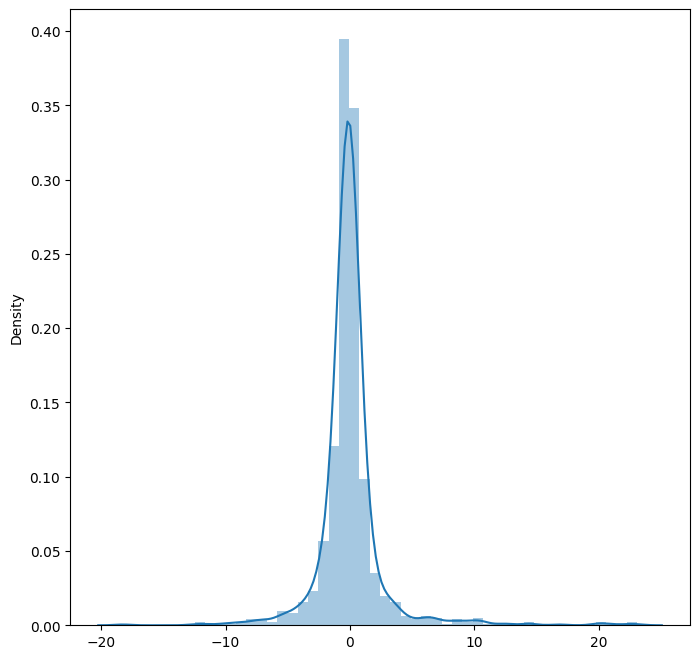

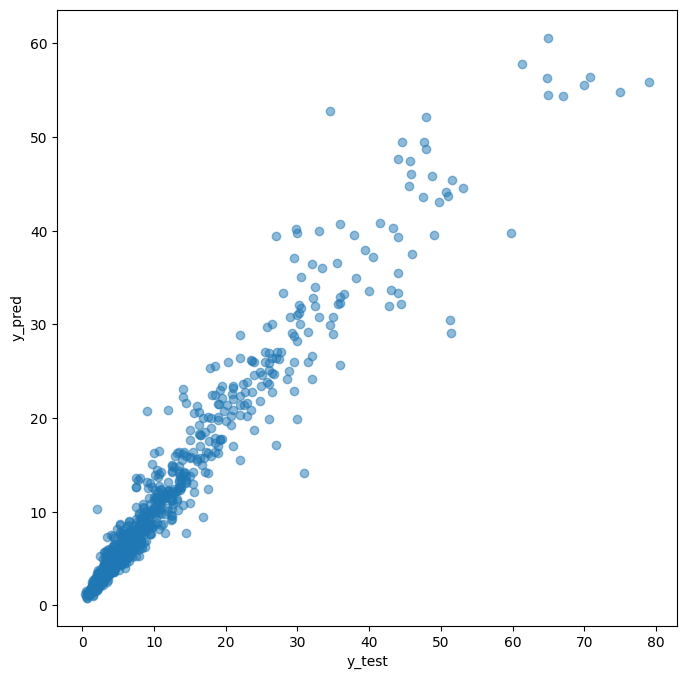

MAE: 1.3336606354917673
MSE: 7.396773457116947
RMSE: 2.7197009867110293


In [43]:
prediction = rf_random.predict(X_test)

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [44]:
rf_random.score(X_train, y_train)

-1.8733030617375677

In [45]:
rf_random.score(X_test, y_test)

-7.396773457116947

# Save Model

In [46]:
import pickle
file = open('car.pkl', 'wb')

pickle.dump(regressor, file)